**Resampling**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_pickle("Data/df.pickle")

In [20]:
df.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
9399,1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
9398,1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
9397,1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
9396,1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
9395,1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [19]:
df['Date']

9399   1980-12-12
9398   1980-12-15
9397   1980-12-16
9396   1980-12-17
9395   1980-12-18
          ...    
4      2018-03-21
3      2018-03-22
2      2018-03-23
1      2018-03-26
0      2018-03-27
Name: Date, Length: 9400, dtype: datetime64[ns]

In [18]:
df['Date'] =  pd.to_datetime(df['Date'])


In [21]:
df.sort_values('Date', inplace=True)

In [22]:
df.set_index('Date', inplace=True)

In [23]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [25]:
df2 = df.resample('3D').mean()

In [26]:
df2.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.750000,28.870,28.750000,28.750000,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,26.206667,26.250,26.123333,26.123333,547700.0,0.0,1.0,0.385312,0.385949,0.384087,0.384087,30671200.0
1980-12-18,27.440000,27.565,27.440000,27.440000,272500.0,0.0,1.0,0.403445,0.405283,0.403445,0.403445,15260000.0
1980-12-21,30.255000,30.375,30.255000,30.255000,188200.0,0.0,1.0,0.444834,0.446598,0.444834,0.444834,10539200.0
1980-12-24,34.000000,34.125,34.000000,34.000000,231200.0,0.0,1.0,0.499896,0.501734,0.499896,0.499896,12947200.0


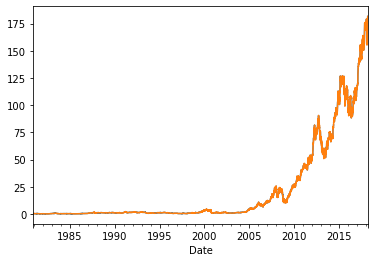

In [27]:
df2['Adj. Close'].plot()
df['Adj. Close'].plot()

In [28]:
df2 = df.resample('12M').mean()

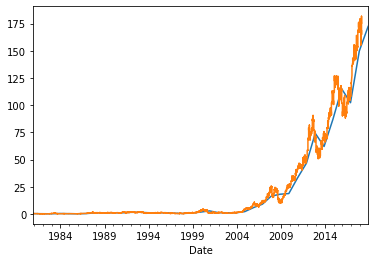

In [29]:
df2['Adj. Close'].plot()
df['Adj. Close'].plot()

In [35]:
df2 = df['Adj. Close'].resample('10D').ohlc()

In [38]:
if df2.isnull().values.sum() > 1:
    print("There are null values")

In [40]:
df2 = df['Adj. Close'].resample('2D').ohlc()

In [41]:
if df2.isnull().values.sum() > 1:
    print("There are null values")

There are null values


In [43]:
df2 = df['Adj. Close'].resample('2D').ohlc().fillna(method='ffill')

In [44]:
if df2.isnull().values.sum() > 1:
    print("There are null values")

In [45]:
def pickle_data():
    df = pd.read_csv("FED-STFBAILSS_XEOP_XDO_XS1A2_MA_N_Q.csv")
    df.to_pickle("Data/df1.pickle")
    
pickle_data()

In [47]:
def pickle_data():
    df = pd.read_csv("Table1Crime.csv")
    df.to_pickle("Data/df2.pickle")
    
pickle_data()

In [49]:
import urllib.request

def pickle_data():
    read = urllib.request.urlopen('https://pkgstore.datahub.io/core/employment-us/aat1_csv/data/d7e5ec6ea0340e846fd84ae6a69519c2/aat1_csv.csv')
    df = pd.read_csv(read)
    df.to_pickle("Data/df3.pickle")

pickle_data()

In [53]:
df1 =  pd.read_pickle("data/df1.pickle")
df2 =  pd.read_pickle("data/df2.pickle")
df3 =  pd.read_pickle("data/df3.pickle")

In [54]:
df1.head()

,Date,Value
0,2020-09-30,1869323.0
1,2020-06-30,1858467.0
2,2020-03-31,1854924.0
3,2019-12-31,1853957.0
4,2019-09-30,1829516.0


In [55]:
df2.head()

,Unnamed: 0,Year,Violent\ncrime2,Violent \ncrime \nrate,Murder and\nnonnegligent \nmanslaughter,Murder and \nnonnegligent \nmanslaughter \nrate,Robbery,Robbery \nrate,Aggravated \nassault,Aggravated \nassault rate,Property \ncrime,Property \ncrime \nrate,Burglary,Burglary \nrate,Larceny-\ntheft,Larceny-\ntheft rate,Motor \nvehicle \ntheft,Motor \nvehicle \ntheft \nrate
0,0,1997,1636096,611.0,18208,6.8,498534,186.2,1023201,382.1,11558475,4316.3,2460526,918.8,7743760,2891.8,1354189,505.7
1,1,1998,1533887,567.6,16974,6.3,447186,165.5,976583,361.4,10951827,4052.5,2332735,863.2,7376311,2729.5,1242781,459.9
2,2,1999,1426044,523.0,15522,5.7,409371,150.1,911740,334.3,10208334,3743.6,2100739,770.4,6955520,2550.7,1152075,422.5
3,3,2000,1425486,506.5,15586,5.5,408016,145.0,911706,324.0,10182584,3618.3,2050992,728.8,6971590,2477.3,1160002,412.2
4,4,2001,1439480,504.5,16037,5.6,423557,148.5,909023,318.6,10437189,3658.1,2116531,741.8,7092267,2485.7,1228391,430.5


In [56]:
df3.head()

,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes
0,1941,99900,55910,56.0,50350,50.4,9100,41250,5560,9.9,43990,NaN
1,1942,98640,56410,57.2,53750,54.5,9250,44500,2660,4.7,42230,NaN
2,1943,94640,55540,58.7,54470,57.6,9080,45390,1070,1.9,39100,NaN
3,1944,93220,54630,58.6,53960,57.9,8950,45010,670,1.2,38590,NaN
4,1945,94090,53860,57.2,52820,56.1,8580,44240,1040,1.9,40230,NaN


In [57]:
df3.corr()

,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes
year,1.000000,0.992435,0.989752,0.942359,0.987678,0.859961,-0.908239,0.991987,0.822102,0.393840,0.983451,NaN
population,0.992435,1.000000,0.998465,0.941977,0.995854,0.856874,-0.859640,0.996675,0.834787,0.401062,0.987642,NaN
labor_force,0.989752,0.998465,1.000000,0.956555,0.998540,0.878932,-0.846147,0.998371,0.823939,0.382889,0.977445,NaN
population_percent,0.942359,0.941977,0.956555,1.000000,0.957539,0.941721,-0.811164,0.957361,0.763161,0.335585,0.884990,NaN
employed_total,0.987678,0.995854,0.998540,0.957539,1.000000,0.897069,-0.840885,0.999423,0.792130,0.335780,0.971618,NaN
employed_percent,0.859961,0.856874,0.878932,0.941721,0.897069,1.000000,-0.707661,0.893620,0.520408,-0.000128,0.780143,NaN
agrictulture_ratio,-0.908239,-0.859640,-0.846147,-0.811164,-0.840885,-0.707661,1.000000,-0.858788,-0.739438,-0.430448,-0.883465,NaN
nonagriculture_ratio,0.991987,0.996675,0.998371,0.957361,0.999423,0.893620,-0.858788,1.000000,0.796279,0.344886,0.975229,NaN
unemployed,0.822102,0.834787,0.823939,0.763161,0.792130,0.520408,-0.739438,0.796279,1.000000,0.803921,0.851539,NaN
unemployed_percent,0.393840,0.401062,0.382889,0.335585,0.335780,-0.000128,-0.430448,0.344886,0.803921,1.000000,0.445782,NaN


In [58]:
df3.cov()

,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes
year,419.690141,9.144971e+05,6.768410e+05,67.835473,6.270953e+05,55.325533,-3.824655e+04,6.653428e+05,4.975139e+04,14.674728,2.376554e+05,0.0
population,914497.147887,2.023168e+09,1.499149e+09,148878.686479,1.388242e+09,121036.187002,-7.948042e+07,1.467725e+09,1.109191e+08,32810.543360,5.240178e+08,0.0
labor_force,676840.964990,1.499149e+09,1.114273e+09,112197.123078,1.033035e+09,92136.834809,-5.805892e+07,1.091096e+09,8.124667e+07,23246.336499,3.848744e+08,0.0
population_percent,67.835473,1.488787e+05,1.121971e+05,12.346740,1.042764e+05,10.391555,-5.858847e+03,1.101354e+05,7.921496e+03,2.144690,3.668136e+04,0.0
employed_total,627095.342254,1.388242e+09,1.033035e+09,104276.418994,9.605221e+08,87309.571388,-5.356951e+07,1.014093e+09,7.252122e+07,18927.531368,3.552057e+08,0.0
employed_percent,55.325533,1.210362e+05,9.213683e+04,10.391555,8.730957e+04,9.861988,-4.568095e+03,9.187770e+04,4.827714e+03,-0.000732,2.889929e+04,0.0
agrictulture_ratio,-38246.549296,-7.948042e+07,-5.805892e+07,-5858.846922,-5.356951e+07,-4568.095191,4.225275e+06,-5.779480e+07,-4.489975e+06,-1609.287787,-2.142139e+07,0.0
nonagriculture_ratio,665342.782897,1.467725e+09,1.091096e+09,110135.403400,1.014093e+09,91877.699336,-5.779480e+07,1.071890e+09,7.701147e+07,20536.971147,3.766278e+08,0.0
unemployed,49751.393964,1.109191e+08,8.124667e+07,7921.495654,7.252122e+07,4827.713883,-4.489975e+06,7.701147e+07,8.726294e+06,4319.307968,2.967221e+07,0.0
unemployed_percent,14.674728,3.281054e+04,2.324634e+04,2.144690,1.892753e+04,-0.000732,-1.609288e+03,2.053697e+04,4.319308e+03,3.308044,9.563991e+03,0.0


In [59]:
df1.columns = ['Year', 'EmpRate']

In [61]:
df1.head()

,Year,EmpRate
0,2020-09-30,1869323.0
1,2020-06-30,1858467.0
2,2020-03-31,1854924.0
3,2019-12-31,1853957.0
4,2019-09-30,1829516.0


In [62]:
df1 = df1.rename(columns = {'Year': 'Year1', 'EmpRate': 'EmpRate1'})

In [63]:
df1.head()


,Year1,EmpRate1
0,2020-09-30,1869323.0
1,2020-06-30,1858467.0
2,2020-03-31,1854924.0
3,2019-12-31,1853957.0
4,2019-09-30,1829516.0


In [64]:
df1.columns = ['Year', 'EmpRate']
df1.head(2)

,Year,EmpRate
0,2020-09-30,1869323.0
1,2020-06-30,1858467.0


In [71]:
df1.set_index('Year', inplace=True)
df2.set_index('Year' ,inplace=True)
df3.set_index('year', inplace=True)

In [72]:
joined = df1.join([df2, df3])

In [73]:
print(joined.head())

            EmpRate  Unnamed: 0  Violent\ncrime2  Violent \ncrime \nrate   \
1985-03-31  63221.0         NaN              NaN                      NaN   
1985-06-30  63981.0         NaN              NaN                      NaN   
1985-09-30  65837.0         NaN              NaN                      NaN   
1985-12-31  66935.0         NaN              NaN                      NaN   
1986-03-31  67430.0         NaN              NaN                      NaN   

            Murder and\nnonnegligent \nmanslaughter  \
1985-03-31                                      NaN   
1985-06-30                                      NaN   
1985-09-30                                      NaN   
1985-12-31                                      NaN   
1986-03-31                                      NaN   

            Murder and \nnonnegligent \nmanslaughter \nrate   Robbery  \
1985-03-31                                               NaN      NaN   
1985-06-30                                               NaN

In [74]:
joined.dropna(inplace=True)

In [76]:
joined

,EmpRate,Unnamed: 0,Violent\ncrime2,Violent \ncrime \nrate,Murder and\nnonnegligent \nmanslaughter,Murder and \nnonnegligent \nmanslaughter \nrate,Robbery,Robbery \nrate,Aggravated \nassault,Aggravated \nassault rate,...,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes


In [83]:
df1.reset_index(inplace=True)

In [91]:
df1['Year'] = pd.to_datetime(df1['Year'])

In [92]:
df1.dtypes

Year       datetime64[ns]
EmpRate           float64
dtype: object

In [94]:
df1.set_index('Year', inplace=True)

In [96]:
df1 = df1.resample('Y').mean()

In [98]:
df1.reset_index(inplace=True)

In [102]:
df1['Year'] =  df1['Year'].dt.strftime('%Y')

In [103]:
df1.head()

,Year,EmpRate,Year1
0,1985,64993.50,1985
1,1986,71974.00,1986
2,1987,84386.00,1987
3,1988,101339.50,1988
4,1989,125658.75,1989


In [106]:
df1.drop('Year1', axis=1, inplace=True)

In [107]:
df1.head()

,Year,EmpRate
0,1985,64993.50
1,1986,71974.00
2,1987,84386.00
3,1988,101339.50
4,1989,125658.75


In [109]:
df1.set_index('Year', inplace=True)

In [112]:
df1.head()

,EmpRate
Year,
1985,64993.50
1986,71974.00
1987,84386.00
1988,101339.50
1989,125658.75


In [113]:
df2.head()

,Unnamed: 0,Violent\ncrime2,Violent \ncrime \nrate,Murder and\nnonnegligent \nmanslaughter,Murder and \nnonnegligent \nmanslaughter \nrate,Robbery,Robbery \nrate,Aggravated \nassault,Aggravated \nassault rate,Property \ncrime,Property \ncrime \nrate,Burglary,Burglary \nrate,Larceny-\ntheft,Larceny-\ntheft rate,Motor \nvehicle \ntheft,Motor \nvehicle \ntheft \nrate
Year,,,,,,,,,,,,,,,,,
1997,0,1636096,611.0,18208,6.8,498534,186.2,1023201,382.1,11558475,4316.3,2460526,918.8,7743760,2891.8,1354189,505.7
1998,1,1533887,567.6,16974,6.3,447186,165.5,976583,361.4,10951827,4052.5,2332735,863.2,7376311,2729.5,1242781,459.9
1999,2,1426044,523.0,15522,5.7,409371,150.1,911740,334.3,10208334,3743.6,2100739,770.4,6955520,2550.7,1152075,422.5
2000,3,1425486,506.5,15586,5.5,408016,145.0,911706,324.0,10182584,3618.3,2050992,728.8,6971590,2477.3,1160002,412.2
2001,4,1439480,504.5,16037,5.6,423557,148.5,909023,318.6,10437189,3658.1,2116531,741.8,7092267,2485.7,1228391,430.5


In [114]:
df3.head()

,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes
year,,,,,,,,,,,
1941,99900,55910,56.0,50350,50.4,9100,41250,5560,9.9,43990,NaN
1942,98640,56410,57.2,53750,54.5,9250,44500,2660,4.7,42230,NaN
1943,94640,55540,58.7,54470,57.6,9080,45390,1070,1.9,39100,NaN
1944,93220,54630,58.6,53960,57.9,8950,45010,670,1.2,38590,NaN
1945,94090,53860,57.2,52820,56.1,8580,44240,1040,1.9,40230,NaN


In [117]:
joined = df2.join([df3, df1])

In [118]:
joined .head()

,Unnamed: 0,Violent\ncrime2,Violent \ncrime \nrate,Murder and\nnonnegligent \nmanslaughter,Murder and \nnonnegligent \nmanslaughter \nrate,Robbery,Robbery \nrate,Aggravated \nassault,Aggravated \nassault rate,Property \ncrime,...,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes,EmpRate
1997,0,1636096,611.0,18208,6.8,498534,186.2,1023201,382.1,11558475,...,67.1,129558.0,63.8,3399.0,126159.0,6739.0,4.9,66836.0,1.0,NaN
1998,1,1533887,567.6,16974,6.3,447186,165.5,976583,361.4,10951827,...,67.1,131463.0,64.1,3378.0,128085.0,6210.0,4.5,67547.0,1.0,NaN
1999,2,1426044,523.0,15522,5.7,409371,150.1,911740,334.3,10208334,...,67.1,133488.0,64.3,3281.0,130207.0,5880.0,4.2,68385.0,1.0,NaN
2000,3,1425486,506.5,15586,5.5,408016,145.0,911706,324.0,10182584,...,67.1,136891.0,64.4,2464.0,134427.0,5692.0,4.0,69994.0,1.0,NaN
2001,4,1439480,504.5,16037,5.6,423557,148.5,909023,318.6,10437189,...,66.8,136933.0,63.7,2299.0,134635.0,6801.0,4.7,71359.0,NaN,NaN


In [119]:
joined.dropna()

,Unnamed: 0,Violent\ncrime2,Violent \ncrime \nrate,Murder and\nnonnegligent \nmanslaughter,Murder and \nnonnegligent \nmanslaughter \nrate,Robbery,Robbery \nrate,Aggravated \nassault,Aggravated \nassault rate,Property \ncrime,...,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes,EmpRate
